In [1]:
import pickle
from sklearn import manifold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pickle.load(open('./data/outputs_lumo_model.pkl', 'rb'))
data2 = pickle.load(open('./data/outputs_TL_homo_lumo_model.pkl', 'rb'))
data3 = pickle.load(open('./data/outputs_TLF_homo_lumo_model.pkl', 'rb'))

data = [data1, data2, data3]
# data = [data1, data2]

In [3]:
data1[3130]

{'positions': array([[ 0.15674278,  1.4900299 ,  0.01243542],
        [ 0.02418239,  0.00514182, -0.04450295],
        [-0.14876473, -0.716783  , -1.1304424 ],
        [-0.21689004, -2.0250423 , -0.7086895 ],
        [-0.08580499, -2.1039138 ,  0.65373695],
        [ 0.07322297, -0.7936842 ,  1.0672646 ],
        [-0.09281813, -3.2441008 ,  1.5865842 ],
        [-1.2237071 , -4.191871  ,  1.672743  ],
        [-0.01970656, -4.5380797 ,  0.99072605],
        [ 1.120197  ,  1.7998335 ,  0.4339792 ],
        [ 0.08348408,  1.8824816 , -1.0024078 ],
        [-0.6326459 ,  1.9499571 ,  0.6185287 ],
        [-0.33778304, -2.8428736 , -1.4013945 ],
        [ 0.1908391 , -0.48347354,  2.0176804 ],
        [ 0.52490985, -3.1269515 ,  2.4802883 ],
        [-1.4084824 , -4.733773  ,  2.6000218 ],
        [-2.0904627 , -4.0279884 ,  1.0352995 ]], dtype=float32),
 'atom_numbers': array([6, 6, 7, 6, 6, 7, 6, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1]),
 'properties': array([-2.10700005e-01,  2.14000009e-02,  3.0

In [4]:
H = 1
C = 6
N = 7
O = 8

embeddings = []

for d in data:
    dataset_embeddings = []
    for molecule in d:
        for idx in range(len(molecule["atom_numbers"])):
            if molecule["atom_numbers"][idx] == C:
                dataset_embeddings.append(molecule["embeddings"][idx])

    embeddings.append(dataset_embeddings)

In [5]:
data = np.array([embeddings])
data = data.squeeze()

In [6]:
print(data[0].shape)

(63438, 32)


In [7]:
import matplotlib.pyplot as plt

tsne_results_x = []
tsne_results_y = []
source_labels = []

i = 0
for d in data:
    tsne = manifold.TSNE(n_components=2, random_state=42, n_iter=300, perplexity=50, learning_rate='auto')
    tsne_result = tsne.fit_transform(d)
    tsne_results_x.append(tsne_result[:, 0])
    tsne_results_y.append(tsne_result[:, 1])
    source_labels.append(np.ones(len(tsne_result[:, 0]))*i)
    i += 1


In [8]:
x = np.array(tsne_results_x).reshape(-1)
y = np.array(tsne_results_y).reshape(-1)
labels = np.array(source_labels).reshape(-1)

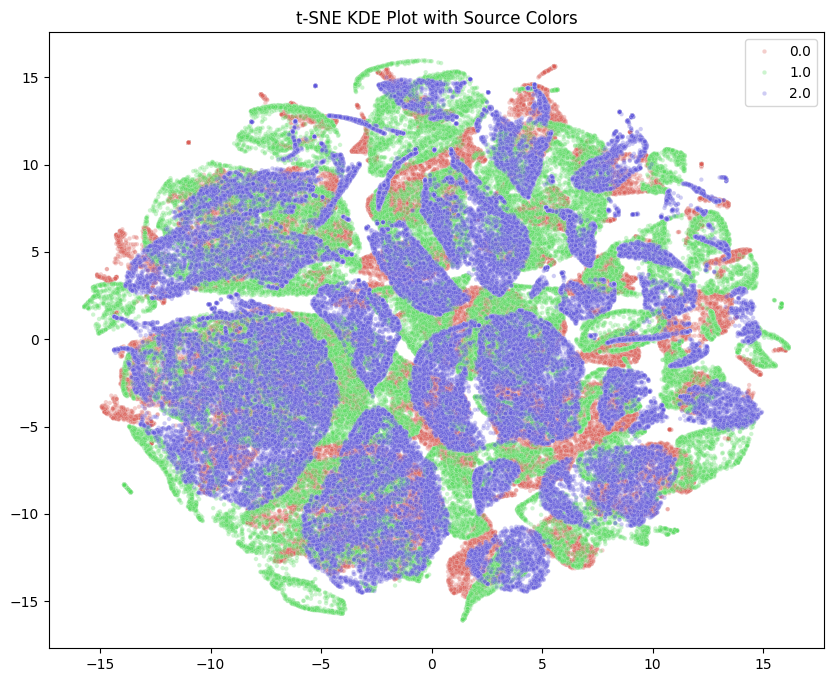

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x,
            y=y,
            hue=labels,
            alpha=0.05,
            palette=sns.color_palette("hls", len(data)),
            s=10,
            legend="full"
            )
plt.title('t-SNE KDE Plot with Source Colors')
plt.show()

/home/aimas/dtu/dl/DeepLearningProject/.venv/lib/python3.10/site-packages/seaborn/utils.py:128: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/home/aimas/dtu/dl/DeepLearningProject/.venv/lib/python3.10/site-packages/seaborn/relational.py:432: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


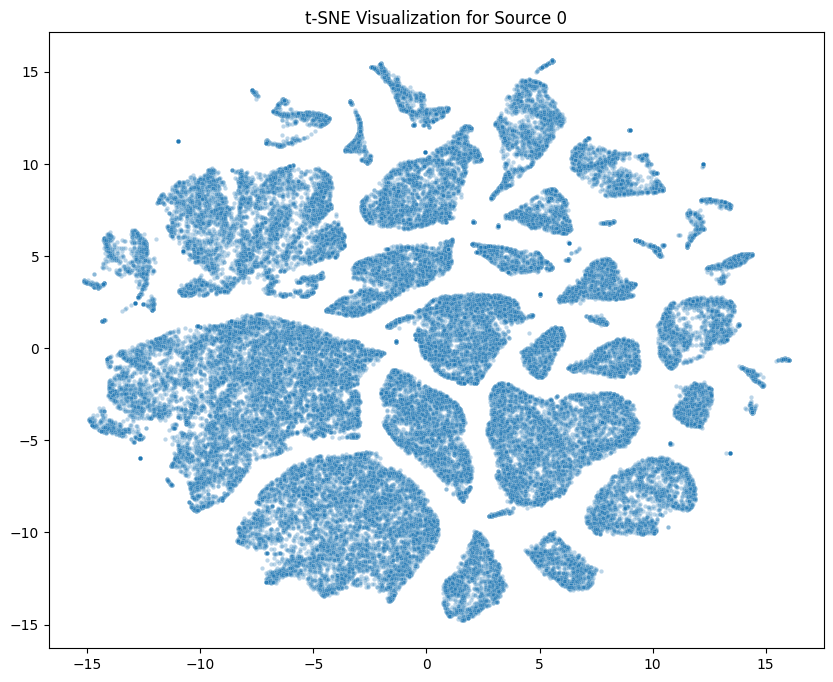

/home/aimas/dtu/dl/DeepLearningProject/.venv/lib/python3.10/site-packages/seaborn/utils.py:128: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/home/aimas/dtu/dl/DeepLearningProject/.venv/lib/python3.10/site-packages/seaborn/relational.py:432: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


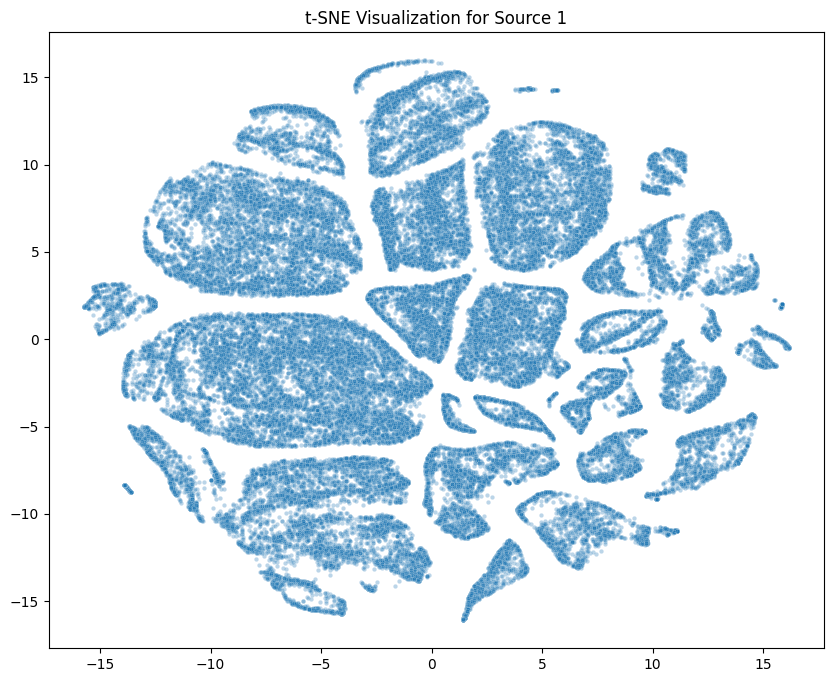

/home/aimas/dtu/dl/DeepLearningProject/.venv/lib/python3.10/site-packages/seaborn/utils.py:128: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/home/aimas/dtu/dl/DeepLearningProject/.venv/lib/python3.10/site-packages/seaborn/relational.py:432: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


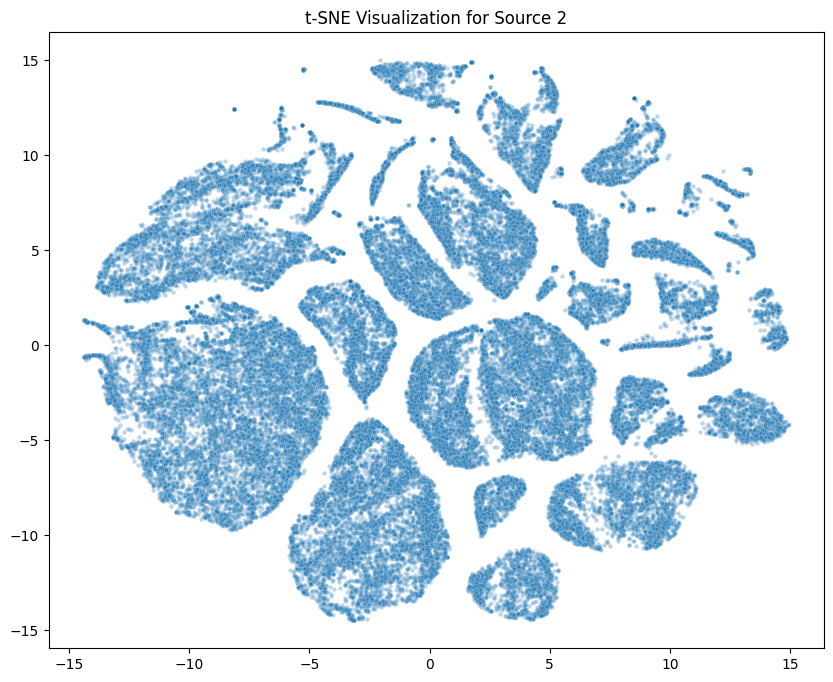

In [10]:
for idx in range(len(data)):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=tsne_results_x[idx], 
                    y=tsne_results_y[idx], 
                    alpha=0.3, 
                    cmap="magma",
                    s=10,
                    )
    plt.title('t-SNE Visualization for Source {}'.format(idx))
    plt.show()